In [32]:
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ReLU, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import numpy as np
import os
import sys
from six.moves import cPickle
import tensorflow as tf
import matplotlib.pyplot as plt

# hyper parameter
batch_size = 32
num_classes = 100
epochs = 30

# 데이터 총 개수 : 40000개
# 클래스 개수 : 100개, 클래스 별 400개 이미지

steps_per_epoch = int(40000/batch_size)
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'trained_model.h5'

In [33]:
import sklearn.model_selection as sk

def load_data():
    path = './data'

    fpath = os.path.join(path, 'train_data')
    
    with open(fpath, 'rb') as f:
        d = cPickle.load(f, encoding='bytes')
        
    X_train = d['data']
    y_train = d['labels']
    y_train = np.reshape(y_train, (len(y_train), 1))

    return X_train, y_train

x_train, y_train = load_data()

# x_train : total img dataset
# y_train : total label datset


# test, train dataset 분류하기 
X_train, X_test, y_train, y_test = sk.train_test_split(x_train,
                                                    y_train,
                                                    test_size=0.33,
                                                    random_state=42,
                                                    shuffle=True)


(26800, 32, 32, 3) uint8
(26800, 1) int64
(13200, 32, 32, 3) uint8
(13200, 1) int64


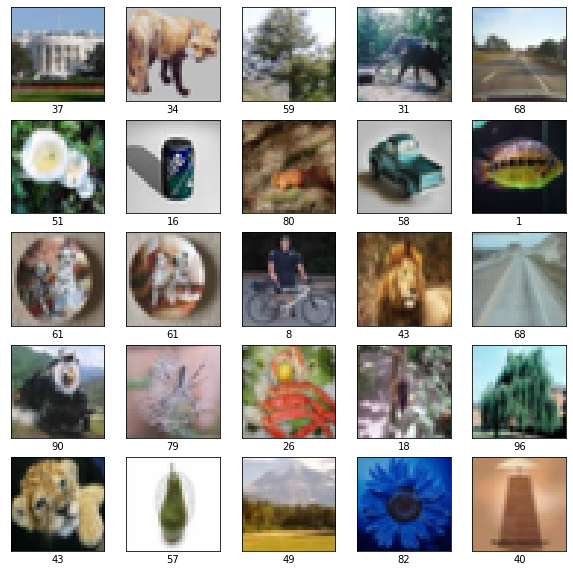

In [34]:
# understand data
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

# check data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(y_train[i][0])
plt.show()

In [4]:
# # Basic image preprocessing

# X_train = X_train.astype('float32')
# X_train /= 255

# X_test = X_test.astype('float32')
# X_test /= 255

# # label preprocessing: one hot encoding

# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)


In [35]:
# normalize data

print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]

newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)

for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])
       
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]

X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 121.98364992663635
std before normalization: 68.30227829343998
mean after normalization: 5.568237965794131e-17
std after normalization: 0.9999999999999987
2.025461104398623


In [36]:
# label preprocessing: one hot encoding

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# 원래 model
model = Sequential()

model.add(Conv2D(50, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            shuffle=True,
            validation_data=(X_test, y_test),
            workers=4)


# 미쳤다 .... 정확도 올라간다... 정확도 올라간다. ..... ㅠㅠ 
# 다른 분류 모델도 더 만들어보자 

In [27]:
batchSize = 512                   #-- Training Batch Size
num_classes = 10                  #-- Number of classes in CIFAR-10 dataset
num_epochs = 50                   #-- Number of epochs for training   
learningRate= 0.001               #-- Learning rate for the network
lr_weight_decay = 0.95            #-- Learning weight decay. Reduce the learn rate by 0.95 after epoch


img_rows = 32                     #-- input image dimensions
img_cols = 32 

In [31]:
from keras import initializers
import copy
result = {}
y = {}
loss = []
acc = []
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for dropout in dropouts:
    print ("Dropout: ", (dropout))
    model = Sequential()

    #-- layer 1
    model.add(Conv2D(64, 3, 3,
                            padding='same',
                            input_shape=(img_rows, img_cols,3)))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 2
    model.add(Conv2D(128, 3, 3, activation='relu', padding='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 3                         
    model.add(Conv2D(256, 3, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##-- layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    #-- layer 5
    model.add(Dense(512, activation='relu'))

    #-- layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    
    model_cce = model.fit(X_train, y_train, batch_size=batchSize, nb_epoch=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    y[dropout] = model.predict(X_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(model_cce.history)   
    loss.append(score[0])
    acc.append(score[1])    
    

Dropout:  0.0


ValueError: Negative dimension size caused by subtracting 2 from 1 for '{{node max_pooling2d_4/MaxPool}} = MaxPool[T=DT_FLOAT, data_format="NHWC", ksize=[1, 2, 2, 1], padding="VALID", strides=[1, 2, 2, 1]](dropout_9/Identity)' with input shapes: [?,1,1,128].

In [ ]:
from keras import initializers
import copy
result = {}
y = {}
loss = []
acc = []
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for dropout in dropouts:
    print ("Dropout: ", (dropout))
    model = Sequential()

    #-- layer 1
    model.add(Conv2D(64, 3, 3,
                            border_mode='same',
                            input_shape=(img_rows, img_cols,3)))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 2
    model.add(Conv2D(128, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 3                         
    model.add(Conv2D(256, 3, 3, activation='relu',border_mode='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##-- layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    #-- layer 5
    model.add(Dense(512, activation='relu'))

    #-- layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])
    
    model_cce = model.fit(X_train, Y_train, batch_size=batchSize, nb_epoch=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    y[dropout] = model.predict(X_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(model_cce.history)   

In [37]:
# 원래 model
model = Sequential()

model.add(Conv2D(50, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Flatten())
model.add(Dense(100))
model.add(Dense(100, activation='softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            shuffle=True,
            validation_data=(X_test, y_test),
            workers=4)

Epoch 1/30
1250/1250 [==============================] - 67s 54ms/step - loss: 3.8844 - accuracy: 0.1412 - val_loss: 3.8320 - val_accuracy: 0.1523
Epoch 2/30
1250/1250 [==============================] - 68s 54ms/step - loss: 3.4203 - accuracy: 0.2221 - val_loss: 3.8154 - val_accuracy: 0.1581
Epoch 3/30
1250/1250 [==============================] - 68s 54ms/step - loss: 3.0841 - accuracy: 0.2881 - val_loss: 3.9656 - val_accuracy: 0.1507
Epoch 4/30
1250/1250 [==============================] - 65s 52ms/step - loss: 2.9626 - accuracy: 0.3095 - val_loss: 4.0067 - val_accuracy: 0.1506
Epoch 5/30
1250/1250 [==============================] - 68s 55ms/step - loss: 2.7204 - accuracy: 0.3620 - val_loss: 4.1643 - val_accuracy: 0.1433
Epoch 6/30
1250/1250 [==============================] - 68s 54ms/step - loss: 2.6527 - accuracy: 0.3756 - val_loss: 4.2594 - val_accuracy: 0.1406
Epoch 7/30
1250/1250 [==============================] - 67s 54ms/step - loss: 2.4489 - accuracy: 0.4249 - val_loss: 4.4437 -

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

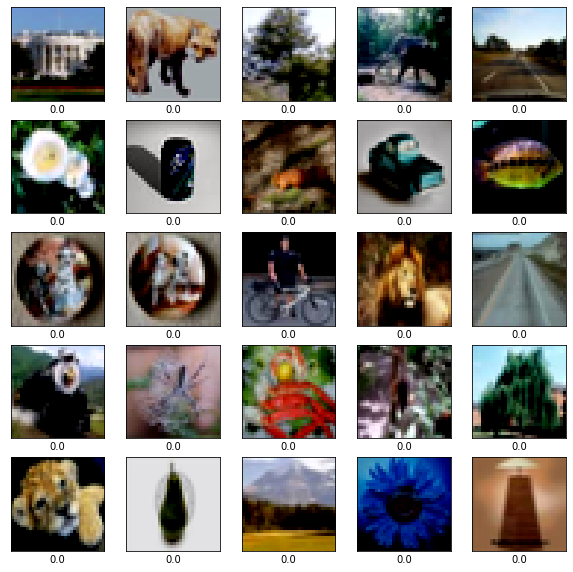

In [31]:
# # image data preprocessing1: brightness

# X_train = tf.image.random_brightness(
#     X_train, 0.5, seed=None
# )

# X_test = tf.image.random_brightness(
#     X_test, 0.5, seed=None
# )


# # image data preprocessing2: contrast
# X_train = tf.image.random_contrast(
#     X_train, 0.2, 1.8, seed=None
# )

# X_test = tf.image.random_contrast(
#     X_test, 0.2, 1.8, seed=None
# )


# plt.figure(figsize=(10,10))

# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(X_train[i])
#     plt.xlabel(y_test[i][0])
# plt.show()

In [5]:

# model2 : 기존 말고 새로운 모델 만들어보기~!

# weight initializer : he_normal
# activation : relu

# add BatchNormalization
# add maxpooling
# add Dropout

from keras.optimizers import adam

model2 = Sequential()

model2.add(Conv2D(50, (3, 3),
                 padding='same',
                 input_shape=X_train.shape[1:],
                 kernel_initializer='he_normal'))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size = (2,2)))

# model2.add(Conv2D(filters = 50, 
#                   kernel_size = (3,3), 
#                   strides = (1,1), 
#                   padding = 'same', 
#                   kernel_initializer='he_normal'))
# model2.add(BatchNormalization())
# model2.add(Activation('relu'))
# model2.add(MaxPooling2D(pool_size = (2,2)))


model2.add(Flatten())

model2.add(Dense(100, activation = 'relu', kernel_initializer='he_normal'))
model2.add(Dropout(0.5))
model2.add(Dense(100, activation = 'softmax', kernel_initializer='he_normal'))

adam = optimizers.Adam(lr = 0.001)

model2.compile(loss = 'categorical_crossentropy', 
               optimizer = adam, 
               metrics = ['accuracy'])

model2.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 50)        1400      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 50)        200       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12800)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1280100   
_________________________________________________________________
dropout (Dropout)            (None, 100)               0

Using TensorFlow backend.


In [6]:
history = model2.fit(X_train, y_train, 
            batch_size=batch_size,
            epochs=epochs,
            steps_per_epoch=steps_per_epoch,
            shuffle=True,
            validation_data=(X_test, y_test),
            workers=4)


Epoch 1/30
1250/1250 [==============================] - 35s 28ms/step - loss: 4.6171 - accuracy: 0.0100 - val_loss: 4.6069 - val_accuracy: 0.0077
Epoch 2/30
1250/1250 [==============================] - 34s 27ms/step - loss: 4.6056 - accuracy: 0.0106 - val_loss: 4.6075 - val_accuracy: 0.0077
Epoch 3/30
1250/1250 [==============================] - 37s 29ms/step - loss: 4.6053 - accuracy: 0.0110 - val_loss: 4.6079 - val_accuracy: 0.0077
Epoch 4/30
1250/1250 [==============================] - 37s 30ms/step - loss: 4.6053 - accuracy: 0.0111 - val_loss: 4.6083 - val_accuracy: 0.0077
Epoch 5/30
1250/1250 [==============================] - 34s 27ms/step - loss: 4.6052 - accuracy: 0.0106 - val_loss: 4.6086 - val_accuracy: 0.0077
Epoch 6/30
1250/1250 [==============================] - 34s 27ms/step - loss: 4.6054 - accuracy: 0.0111 - val_loss: 4.6085 - val_accuracy: 0.0077
Epoch 7/30
1250/1250 [==============================] - 34s 27ms/step - loss: 4.6054 - accuracy: 0.0116 - val_loss: 4.6083 -

KeyboardInterrupt: 

In [30]:
# 32x32의 크기를 가지는 RGB(3채널) 이미지
# 데이터의 총 개수는 40000개
# 클래스의 개수는 100개
# 각 클래스별 400장의 이미지
# train, test, validation set은 구분되어 있지 않습니다. 필요시 직접 구현하여 사용